In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import sklearn.metrics as mt
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.signal import find_peaks

In [5]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

In [6]:
df = pd.read_csv("KU-HAR_time_domain_subsamples_20750x300.csv",header=None)
dff = df.values
signals = dff[:, 0: 1800]                         #These are the time-domian subsamples (signals) 
signals = np.array(signals, dtype=np.float32)
labels = dff[:, 1800]                             #These are their associated class labels (signals)

print(signals.shape)
print(labels.shape)

(20750, 1800)
(20750,)


In [7]:
df

0         1         2         3         4         5         6     \
0      0.004230 -0.000280 -0.013906 -0.002544  0.027433  0.058300  0.051670   
1      0.012482  0.032496  0.067856  0.071552  0.078103  0.040353 -0.001059   
2      0.012127  0.028458  0.062075  0.052611  0.022942 -0.010017 -0.023151   
3      0.052964  0.074319  0.110670  0.108490  0.091825  0.056989  0.029337   
4     -0.020462 -0.030787 -0.008617  0.008906  0.045046  0.042136  0.045037   
...         ...       ...       ...       ...       ...       ...       ...   
20745  1.871600  1.648800  1.608900  1.802300  1.475000  1.390700  1.137800   
20746  1.889400  2.022700  0.817300 -0.505840  2.462200  3.814200  2.661000   
20747  1.269500  1.312200  0.725570  0.531290  0.958420 -0.049679  1.223100   
20748 -5.562200 -2.797000 -2.353300 -3.075600 -4.136100 -4.028800 -0.580260   
20749  0.838100 -1.211600 -0.567180 -0.555320 -0.644960 -0.232160  0.367070   

           7         8         9     ...      1793      1794      1795  \
0      0.071857  0.080653  0.047917  ... -0.016692 -0.018566 -0.017361   
1     -0.018580 -0.026813 -0.011280  ... -0.008210 -0.010408 -0.011459   
2     -0.028515  0.005036  0.008450  ...  0.000915  0.000771 -0.002560   
3     -0.016724 -0.042265 -0.053983  ... -0.001209  0.002878  0.000663   
4      0.045182  0.025113  0.021730  ... -0.006369 -0.006614 -0.004698   
...         ...       ...       ...  ...       ...       ...       ...   
20745  1.289600  0.963750  1.022200  ... -0.497640 -0.432590 -0.414760   
20746  2.651200  1.991400  4.427300  ... -0.208820 -0.288930 -0.320880   
20747  1.837000  0.989740  1.882600  ...  1.218500  1.125400  0.639470   
20748  0.346070 -2.631700 -2.790000  ... -0.246670 -0.209020 -0.128670   
20749 -0.040700  0.185980 -0.009721  ...  0.261620  0.119120  0.004095   

           1796      1797      1798      1799  1800  1801   1802  
0     -0.017919 -0.016680 -0.016650 -0.013097     0   300      1  
1     -0.011747 -0.010394 -0.008070 -0.004354     0   300      2  
2     -0.003020 -0.004190  0.000215  0.000850     0   300      3  
3      0.000982 -0.002148 -0.009200 -0.010653     0   300      4  
4     -0.007279 -0.006861 -0.006161 -0.006113     0   300      5  
...         ...       ...       ...       ...   ...   ...    ...  
20745 -0.363110 -0.329190 -0.460960 -0.621920     9   300  20746  
20746 -0.379540 -0.408210 -0.507970 -0.548040     9   300  20747  
20747  0.277320  0.172710 -0.002894  0.023955     9   300  20748  
20748 -0.104730 -0.131960 -0.150780 -0.187320     9   300  20749  
20749  0.006755  0.013448  0.027566  0.140510     9   300  20750  

[20750 rows x 1803 columns]

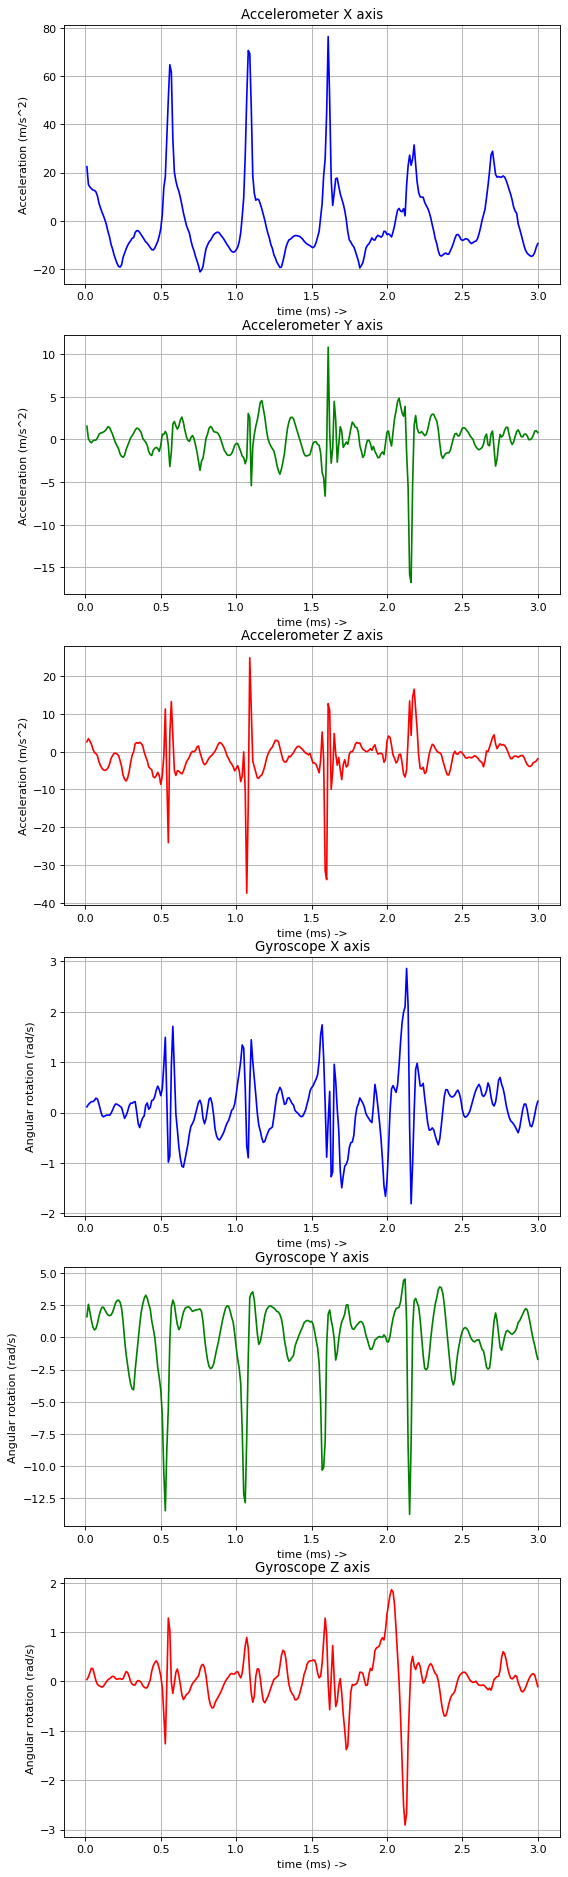

In [8]:

Accelerometer_X_axis_data = signals[20000, 0: 300]
Accelerometer_Y_axis_data = signals[20000, 300: 600]
Accelerometer_Z_axis_data = signals[20000, 600: 900]
Gyroscope_X_axis_data = signals[20000, 900: 1200]
Gyroscope_Y_axis_data = signals[20000, 1200: 1500]
Gyroscope_Z_axis_data = signals[20000, 1500: 1800]
time = np.linspace(.01, 3, 300)

figure(figsize=(8, 30), dpi=80)

ax1 = plt.subplot(611)
ax1.plot(time, Accelerometer_X_axis_data, 'b')
ax1.title.set_text('Accelerometer X axis')
ax1.set_xlabel('time (ms) ->')
ax1.set_ylabel('Acceleration (m/s^2)')
ax1.grid(True)

ax2 = plt.subplot(612)
ax2.plot(time, Accelerometer_Y_axis_data, 'g')
ax2.title.set_text('Accelerometer Y axis')
ax2.set_xlabel('time (ms) ->')
ax2.set_ylabel('Acceleration (m/s^2)')
ax2.grid(True)

ax3 = plt.subplot(613)
ax3.plot(time, Accelerometer_Z_axis_data, 'r')
ax3.title.set_text('Accelerometer Z axis')
ax3.set_xlabel('time (ms) ->')
ax3.set_ylabel('Acceleration (m/s^2)')
ax3.grid(True)

ax4 = plt.subplot(614)
ax4.plot(time, Gyroscope_X_axis_data, 'b')
ax4.title.set_text('Gyroscope X axis')
ax4.set_xlabel('time (ms) ->')
ax4.set_ylabel('Angular rotation (rad/s)')
ax4.grid(True)

ax5 = plt.subplot(615)
ax5.plot(time, Gyroscope_Y_axis_data, 'g')
ax5.title.set_text('Gyroscope Y axis')
ax5.set_xlabel('time (ms) ->')
ax5.set_ylabel('Angular rotation (rad/s)')
ax5.grid(True)

ax6 = plt.subplot(616)
ax6.plot(time, Gyroscope_Z_axis_data, 'r')
ax6.title.set_text('Gyroscope Z axis')
ax6.set_xlabel('time (ms) ->')
ax6.set_ylabel('Angular rotation (rad/s)')
ax6.grid(True)

plt.show()

In [9]:
fft = np.zeros(signals.shape, dtype=np.float32)
for i in range(0,len(signals)):
    for j in range(0, 6):
        tmp = np.fft.fft(signals[i, j*300:(j+1)*300])
        fft[i, j*300:(j+1)*300] = abs(tmp)
        
print(fft.shape)

(20750, 1800)


In [10]:
pd_fft = pd.DataFrame(fft)
pd_fft.describe()



0             1             2              3              4     \
count  2.075000e+04  2.075000e+04  2.075000e+04   20750.000000   20750.000000   
mean   6.926604e+04  1.867759e+03  9.533297e+02     658.600037     523.824524   
std    1.286702e+06  3.529056e+04  1.748809e+04   11603.351562    8683.156250   
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000       0.000000   
25%    3.297661e+00  9.165191e-01  7.941197e-01       0.700801       0.725051   
50%    1.498055e+01  1.715950e+01  2.101822e+01      27.582238      27.907348   
75%    5.099594e+01  5.597910e+01  6.680669e+01      68.590788      74.474609   
max    4.417411e+07  2.018532e+06  1.009120e+06  672685.312500  504457.625000   

                5              6              7              8     \
count   20750.000000   20750.000000   20750.000000   20750.000000   
mean      446.020630     395.723846     321.296509     300.331665   
std      6937.568359    5786.770020    4964.765625    4355.506348   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.747128       0.744240       0.845354       1.023255   
50%        25.569739      23.965218      23.208875      22.068994   
75%        79.236082      70.010878      59.522388      56.291468   
max    403511.781250  336206.343750  288129.468750  252061.890625   

                9     ...          1790           1791           1792  \
count   20750.000000  ...  20750.000000   20750.000000   20750.000000   
mean      270.293671  ...    112.382072     125.514290     141.168945   
std      3870.685303  ...   2024.938232    2245.363525    2529.565430   
min         0.000000  ...      0.000000       0.000000       0.000000   
25%         1.110206  ...      0.159465       0.173963       0.188823   
50%        21.402491  ...      2.944932       3.168531       3.526558   
75%        57.140640  ...      7.405199       8.635723       9.529878   
max    224000.640625  ...  92102.515625  102303.031250  115053.976562   

                1793           1794           1795           1796  \
count   20750.000000   20750.000000   20750.000000   20750.000000   
mean      158.305832     183.847092     218.353104     274.901215   
std      2884.781738    3370.958008    4036.488037    5054.220703   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.193472       0.208131       0.238443       0.267060   
50%         3.868164       4.360000       4.753028       5.382672   
75%         9.629383      10.363270      11.409839      13.449478   
max    131458.484375  153320.265625  183951.890625  229906.125000   

                1797           1798           1799  
count   20750.000000   20750.000000   20750.000000  
mean      362.531647     537.279724    1070.893921  
std      6736.992676   10115.821289   20479.734375  
min         0.000000       0.000000       0.000000  
25%         0.300049       0.346148       0.449047  
50%         6.844644       7.408556       6.407245  
75%        17.772502      20.995845      21.841642  
max    306498.437500  459705.593750  919427.062500  

[8 rows x 1800 columns]

In [11]:
pd_labels = pd.DataFrame(labels)

In [12]:
df.head()

0         1         2         3         4         5         6     \
0  0.004230 -0.000280 -0.013906 -0.002544  0.027433  0.058300  0.051670   
1  0.012482  0.032496  0.067856  0.071552  0.078103  0.040353 -0.001059   
2  0.012127  0.028458  0.062075  0.052611  0.022942 -0.010017 -0.023151   
3  0.052964  0.074319  0.110670  0.108490  0.091825  0.056989  0.029337   
4 -0.020462 -0.030787 -0.008617  0.008906  0.045046  0.042136  0.045037   

       7         8         9     ...      1793      1794      1795      1796  \
0  0.071857  0.080653  0.047917  ... -0.016692 -0.018566 -0.017361 -0.017919   
1 -0.018580 -0.026813 -0.011280  ... -0.008210 -0.010408 -0.011459 -0.011747   
2 -0.028515  0.005036  0.008450  ...  0.000915  0.000771 -0.002560 -0.003020   
3 -0.016724 -0.042265 -0.053983  ... -0.001209  0.002878  0.000663  0.000982   
4  0.045182  0.025113  0.021730  ... -0.006369 -0.006614 -0.004698 -0.007279   

       1797      1798      1799  1800  1801  1802  
0 -0.016680 -0.016650 -0.013097     0   300     1  
1 -0.010394 -0.008070 -0.004354     0   300     2  
2 -0.004190  0.000215  0.000850     0   300     3  
3 -0.002148 -0.009200 -0.010653     0   300     4  
4 -0.006861 -0.006161 -0.006113     0   300     5  

[5 rows x 1803 columns]

In [13]:
df.tail()

0       1        2        3        4         5        6        7     \
20745  1.8716  1.6488  1.60890  1.80230  1.47500  1.390700  1.13780  1.28960   
20746  1.8894  2.0227  0.81730 -0.50584  2.46220  3.814200  2.66100  2.65120   
20747  1.2695  1.3122  0.72557  0.53129  0.95842 -0.049679  1.22310  1.83700   
20748 -5.5622 -2.7970 -2.35330 -3.07560 -4.13610 -4.028800 -0.58026  0.34607   
20749  0.8381 -1.2116 -0.56718 -0.55532 -0.64496 -0.232160  0.36707 -0.04070   

          8         9     ...     1793     1794      1795      1796      1797  \
20745  0.96375  1.022200  ... -0.49764 -0.43259 -0.414760 -0.363110 -0.329190   
20746  1.99140  4.427300  ... -0.20882 -0.28893 -0.320880 -0.379540 -0.408210   
20747  0.98974  1.882600  ...  1.21850  1.12540  0.639470  0.277320  0.172710   
20748 -2.63170 -2.790000  ... -0.24667 -0.20902 -0.128670 -0.104730 -0.131960   
20749  0.18598 -0.009721  ...  0.26162  0.11912  0.004095  0.006755  0.013448   

           1798      1799  1800  1801   1802  
20745 -0.460960 -0.621920     9   300  20746  
20746 -0.507970 -0.548040     9   300  20747  
20747 -0.002894  0.023955     9   300  20748  
20748 -0.150780 -0.187320     9   300  20749  
20749  0.027566  0.140510     9   300  20750  

[5 rows x 1803 columns]

In [14]:
d = {'STAND': '0',
    'SIT': '1',
     'TALK_SIT': '2',
     'TALK_STAND': '3',
     'STAND_SIT': '4',
     'LAY': '5',
     'LAY_STAND': '6',
     'PICK': '7',
     'JUMP': '8',
     'PUSH_UP': '9',
     'SIT_UP': '10',
     'WALK': '11',
     'WALK_BACKWARD': '12',
     'WALK_CIRCLE': '13',
     'RUN': '14',
     'STAIR_UP': '15',
     'STAIR_DOWN': '16',
     'TABLE_TENNIS': '17'}

print(d['STAND'])


0


In [15]:
#EDA
pd_labels.columns =['ACTIVITY']

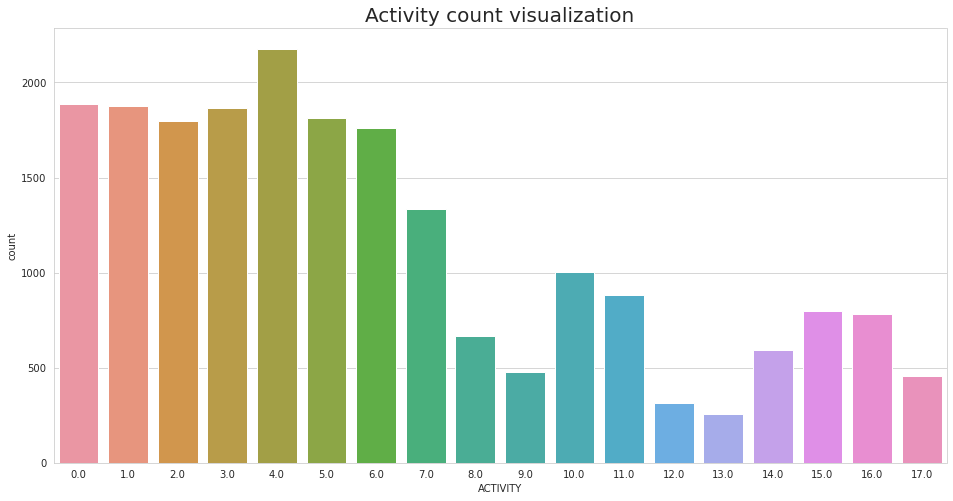

In [16]:
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'
plt.figure(figsize=(16,8))
plt.title('Activity count visualization', fontsize=20)
sns.countplot(x='ACTIVITY', data = pd_labels)
plt.show()

(300,)


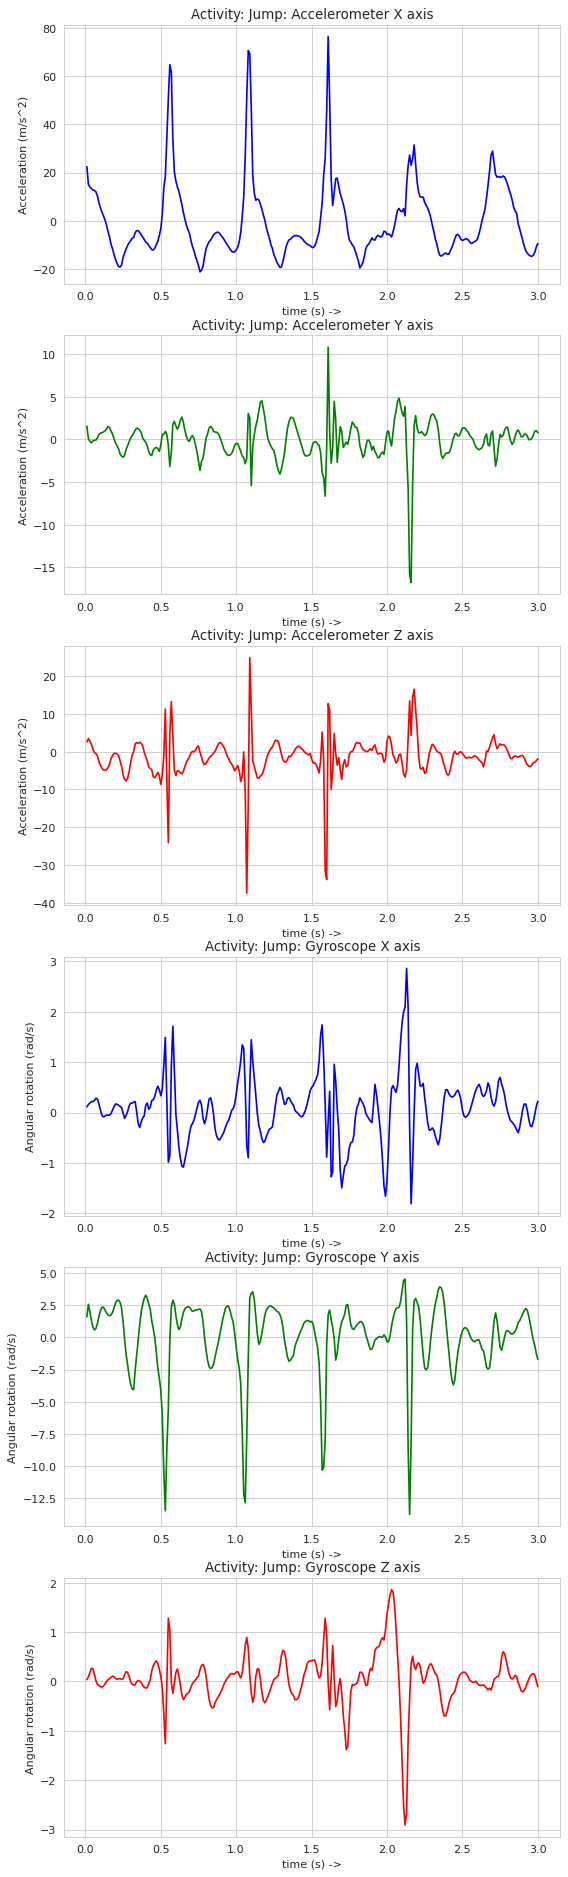

In [17]:
# Visualization of the 20001th sample (the correspondig activity is "Jump"):

Accelerometer_X_axis_data = signals[20000, 0: 300]
Accelerometer_Y_axis_data = signals[20000, 300: 600]
Accelerometer_Z_axis_data = signals[20000, 600: 900]
Gyroscope_X_axis_data = signals[20000, 900: 1200]
Gyroscope_Y_axis_data = signals[20000, 1200: 1500]
Gyroscope_Z_axis_data = signals[20000, 1500: 1800]

print(Accelerometer_Z_axis_data.shape)
time = np.linspace(.01, 3, 300)

figure(figsize=(8, 30), dpi=80)

ax1 = plt.subplot(6,1,1)
ax1.plot(time, Accelerometer_X_axis_data, 'b')
ax1.title.set_text('Activity: Jump: Accelerometer X axis')
ax1.set_xlabel('time (s) ->')
ax1.set_ylabel('Acceleration (m/s^2)')
ax1.grid(True)

ax2 = plt.subplot(6,1,2)
ax2.plot(time, Accelerometer_Y_axis_data, 'g')
ax2.title.set_text('Activity: Jump: Accelerometer Y axis')
ax2.set_xlabel('time (s) ->')
ax2.set_ylabel('Acceleration (m/s^2)')
ax2.grid(True)

ax3 = plt.subplot(6,1,3)
ax3.plot(time, Accelerometer_Z_axis_data, 'r')
ax3.title.set_text('Activity: Jump: Accelerometer Z axis')
ax3.set_xlabel('time (s) ->')
ax3.set_ylabel('Acceleration (m/s^2)')
ax3.grid(True)

ax4 = plt.subplot(6,1,4)
ax4.plot(time, Gyroscope_X_axis_data, 'b')
ax4.title.set_text('Activity: Jump: Gyroscope X axis')
ax4.set_xlabel('time (s) ->')
ax4.set_ylabel('Angular rotation (rad/s)')
ax4.grid(True)

ax5 = plt.subplot(6,1,5)
ax5.plot(time, Gyroscope_Y_axis_data, 'g')
ax5.title.set_text('Activity: Jump: Gyroscope Y axis')
ax5.set_xlabel('time (s) ->')
ax5.set_ylabel('Angular rotation (rad/s)')
ax5.grid(True)

ax6 = plt.subplot(6,1,6)
ax6.plot(time, Gyroscope_Z_axis_data, 'r')
ax6.title.set_text('Activity: Jump: Gyroscope Z axis')
ax6.set_xlabel('time (s) ->')
ax6.set_ylabel('Angular rotation (rad/s)')
ax6.grid(True)

plt.show()

(300,)


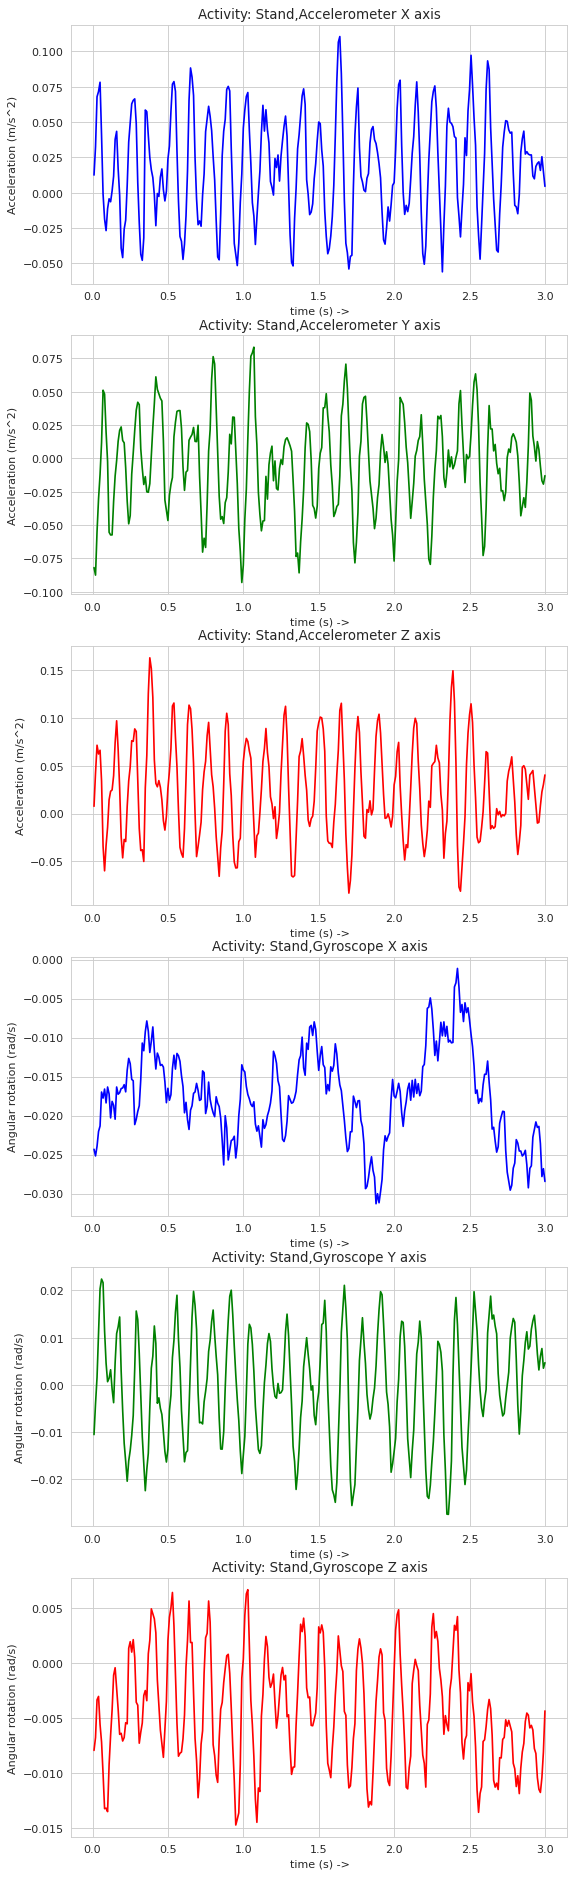

In [18]:
# Visualization of the 2nd sample (the correspondig activity is "Stand"):

Accelerometer_X_axis_data = signals[1, 0: 300]
Accelerometer_Y_axis_data = signals[1, 300: 600]
Accelerometer_Z_axis_data = signals[1, 600: 900]
Gyroscope_X_axis_data = signals[1, 900: 1200]
Gyroscope_Y_axis_data = signals[1, 1200: 1500]
Gyroscope_Z_axis_data = signals[1, 1500: 1800]

print(Accelerometer_Z_axis_data.shape)
time = np.linspace(.01, 3, 300)

figure(figsize=(8, 30), dpi=80)

ax1 = plt.subplot(6,1,1)
ax1.plot(time, Accelerometer_X_axis_data, 'b')
ax1.title.set_text('Activity: Stand,Accelerometer X axis')
ax1.set_xlabel('time (s) ->')
ax1.set_ylabel('Acceleration (m/s^2)')
ax1.grid(True)

ax2 = plt.subplot(6,1,2)
ax2.plot(time, Accelerometer_Y_axis_data, 'g')
ax2.title.set_text('Activity: Stand,Accelerometer Y axis')
ax2.set_xlabel('time (s) ->')
ax2.set_ylabel('Acceleration (m/s^2)')
ax2.grid(True)

ax3 = plt.subplot(6,1,3)
ax3.plot(time, Accelerometer_Z_axis_data, 'r')
ax3.title.set_text('Activity: Stand,Accelerometer Z axis')
ax3.set_xlabel('time (s) ->')
ax3.set_ylabel('Acceleration (m/s^2)')
ax3.grid(True)

ax4 = plt.subplot(6,1,4)
ax4.plot(time, Gyroscope_X_axis_data, 'b')
ax4.title.set_text('Activity: Stand,Gyroscope X axis')
ax4.set_xlabel('time (s) ->')
ax4.set_ylabel('Angular rotation (rad/s)')
ax4.grid(True)

ax5 = plt.subplot(6,1,5)
ax5.plot(time, Gyroscope_Y_axis_data, 'g')
ax5.title.set_text('Activity: Stand,Gyroscope Y axis')
ax5.set_xlabel('time (s) ->')
ax5.set_ylabel('Angular rotation (rad/s)')
ax5.grid(True)

ax6 = plt.subplot(6,1,6)
ax6.plot(time, Gyroscope_Z_axis_data, 'r')
ax6.title.set_text('Activity: Stand,Gyroscope Z axis')
ax6.set_xlabel('time (s) ->')
ax6.set_ylabel('Angular rotation (rad/s)')
ax6.grid(True)

plt.show()

(300,)


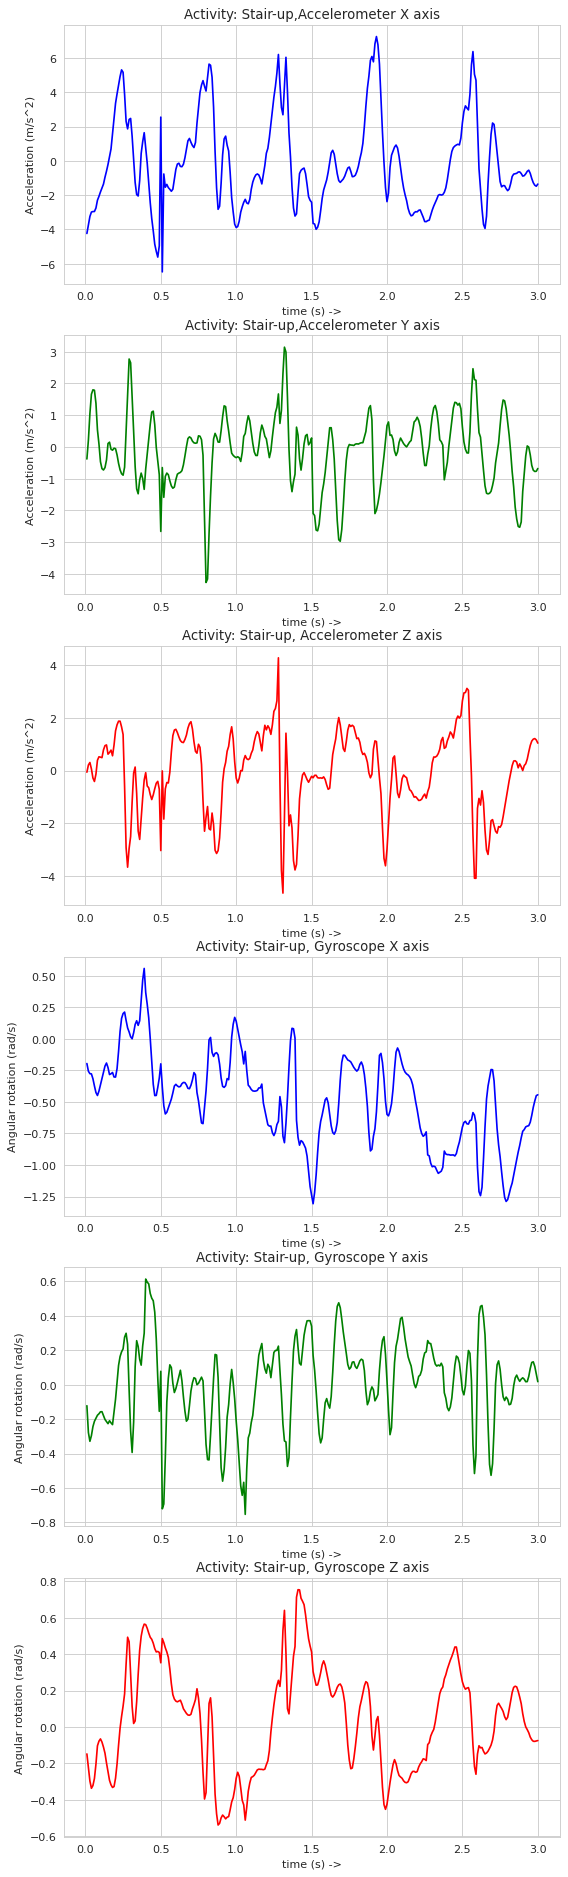

In [19]:
# Visualization of the 7000th sample (the correspondig activity is "Stair-up"):

Accelerometer_X_axis_data = signals[7000, 0: 300]
Accelerometer_Y_axis_data = signals[7000, 300: 600]
Accelerometer_Z_axis_data = signals[7000, 600: 900]
Gyroscope_X_axis_data = signals[7000, 900: 1200]
Gyroscope_Y_axis_data = signals[7000, 1200: 1500]
Gyroscope_Z_axis_data = signals[7000, 1500: 1800]

print(Accelerometer_Z_axis_data.shape)
time = np.linspace(.01, 3, 300)

figure(figsize=(8, 30), dpi=80)

ax1 = plt.subplot(6,1,1)
ax1.plot(time, Accelerometer_X_axis_data, 'b')
ax1.title.set_text('Activity: Stair-up,Accelerometer X axis')
ax1.set_xlabel('time (s) ->')
ax1.set_ylabel('Acceleration (m/s^2)')
ax1.grid(True)

ax2 = plt.subplot(6,1,2)
ax2.plot(time, Accelerometer_Y_axis_data, 'g')
ax2.title.set_text('Activity: Stair-up,Accelerometer Y axis')
ax2.set_xlabel('time (s) ->')
ax2.set_ylabel('Acceleration (m/s^2)')
ax2.grid(True)

ax3 = plt.subplot(6,1,3)
ax3.plot(time, Accelerometer_Z_axis_data, 'r')
ax3.title.set_text('Activity: Stair-up, Accelerometer Z axis')
ax3.set_xlabel('time (s) ->')
ax3.set_ylabel('Acceleration (m/s^2)')
ax3.grid(True)

ax4 = plt.subplot(6,1,4)
ax4.plot(time, Gyroscope_X_axis_data, 'b')
ax4.title.set_text('Activity: Stair-up, Gyroscope X axis')
ax4.set_xlabel('time (s) ->')
ax4.set_ylabel('Angular rotation (rad/s)')
ax4.grid(True)

ax5 = plt.subplot(6,1,5)
ax5.plot(time, Gyroscope_Y_axis_data, 'g')
ax5.title.set_text('Activity: Stair-up, Gyroscope Y axis')
ax5.set_xlabel('time (s) ->')
ax5.set_ylabel('Angular rotation (rad/s)')
ax5.grid(True)

ax6 = plt.subplot(6,1,6)
ax6.plot(time, Gyroscope_Z_axis_data, 'r')
ax6.title.set_text('Activity: Stair-up, Gyroscope Z axis')
ax6.set_xlabel('time (s) ->')
ax6.set_ylabel('Angular rotation (rad/s)')
ax6.grid(True)

plt.show()

In [20]:
# Examine the breakdown of activities-- to see if balanced or not
pd_labels.ACTIVITY.value_counts(normalize=True)

4.0     0.104964
0.0     0.090892
1.0     0.090313
3.0     0.089928
5.0     0.087373
2.0     0.086602
6.0     0.084916
7.0     0.064241
10.0    0.048434
11.0    0.042506
15.0    0.038458
16.0    0.037639
8.0     0.032096
14.0    0.028675
9.0     0.023133
17.0    0.022072
12.0    0.015277
13.0    0.012482
Name: ACTIVITY, dtype: float64

In [21]:
print('min = ',pd_fft.iloc[:, :].min().value_counts())
print('max = ',pd_fft.iloc[:, :].max().value_counts())

min =  0.0    1800
dtype: int64
max =  3.000016e+04    2
7.341750e+03    2
7.390552e+03    2
7.395825e+03    2
7.400738e+03    2
               ..
5.198234e+07    1
3.190559e+04    1
5.663147e+07    1
2.073540e+04    1
9.635000e+03    1
Length: 906, dtype: int64


In [22]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=0.9)

body_acc_x_train = pd.DataFrame(signals[0:20750, 0:300])
body_acc_y_train = pd.DataFrame(signals[0:20750, 300: 600])
body_acc_z_train =  pd.DataFrame(signals[0:20750, 600: 900])
body_gyro_x_train =pd.DataFrame(signals[0:20750, 900: 1200])
body_gyro_y_train =pd.DataFrame(signals[0:20750,  1200: 1500])
body_gyro_z_train =pd.DataFrame(signals[0:20750, 1500: 1800])

body_acc_x_train.shape

(20750, 300)

In [23]:
body_acc_x_train_fft = pd.DataFrame(fft[0:20750, 0:300])
body_acc_y_train_fft = pd.DataFrame(fft[0:20750, 300: 600])
body_acc_z_train_fft =  pd.DataFrame(fft[0:20750, 600: 900])
body_gyro_x_train_fft =pd.DataFrame(fft[0:20750, 900: 1200])
body_gyro_y_train_fft =pd.DataFrame(fft[0:20750,  1200: 1500])
body_gyro_z_train_fft =pd.DataFrame(fft[0:20750, 1500: 1800])

In [24]:
pd.DataFrame(body_acc_x_train).head

<bound method NDFrame.head of             0         1         2         3         4         5         6    \
0      0.004231 -0.000280 -0.013906 -0.002544  0.027433  0.058300  0.051670   
1      0.012482  0.032496  0.067856  0.071552  0.078103  0.040353 -0.001060   
2      0.012127  0.028458  0.062075  0.052611  0.022942 -0.010017 -0.023151   
3      0.052964  0.074319  0.110670  0.108490  0.091825  0.056989  0.029337   
4     -0.020462 -0.030787 -0.008617  0.008907  0.045046  0.042136  0.045037   
...         ...       ...       ...       ...       ...       ...       ...   
20745  1.871600  1.648800  1.608900  1.802300  1.475000  1.390700  1.137800   
20746  1.889400  2.022700  0.817300 -0.505840  2.462200  3.814200  2.661000   
20747  1.269500  1.312200  0.725570  0.531290  0.958420 -0.049679  1.223100   
20748 -5.562200 -2.797000 -2.353300 -3.075600 -4.136100 -4.028800 -0.580260   
20749  0.838100 -1.211600 -0.567180 -0.555320 -0.644960 -0.232160  0.367070   

            7        

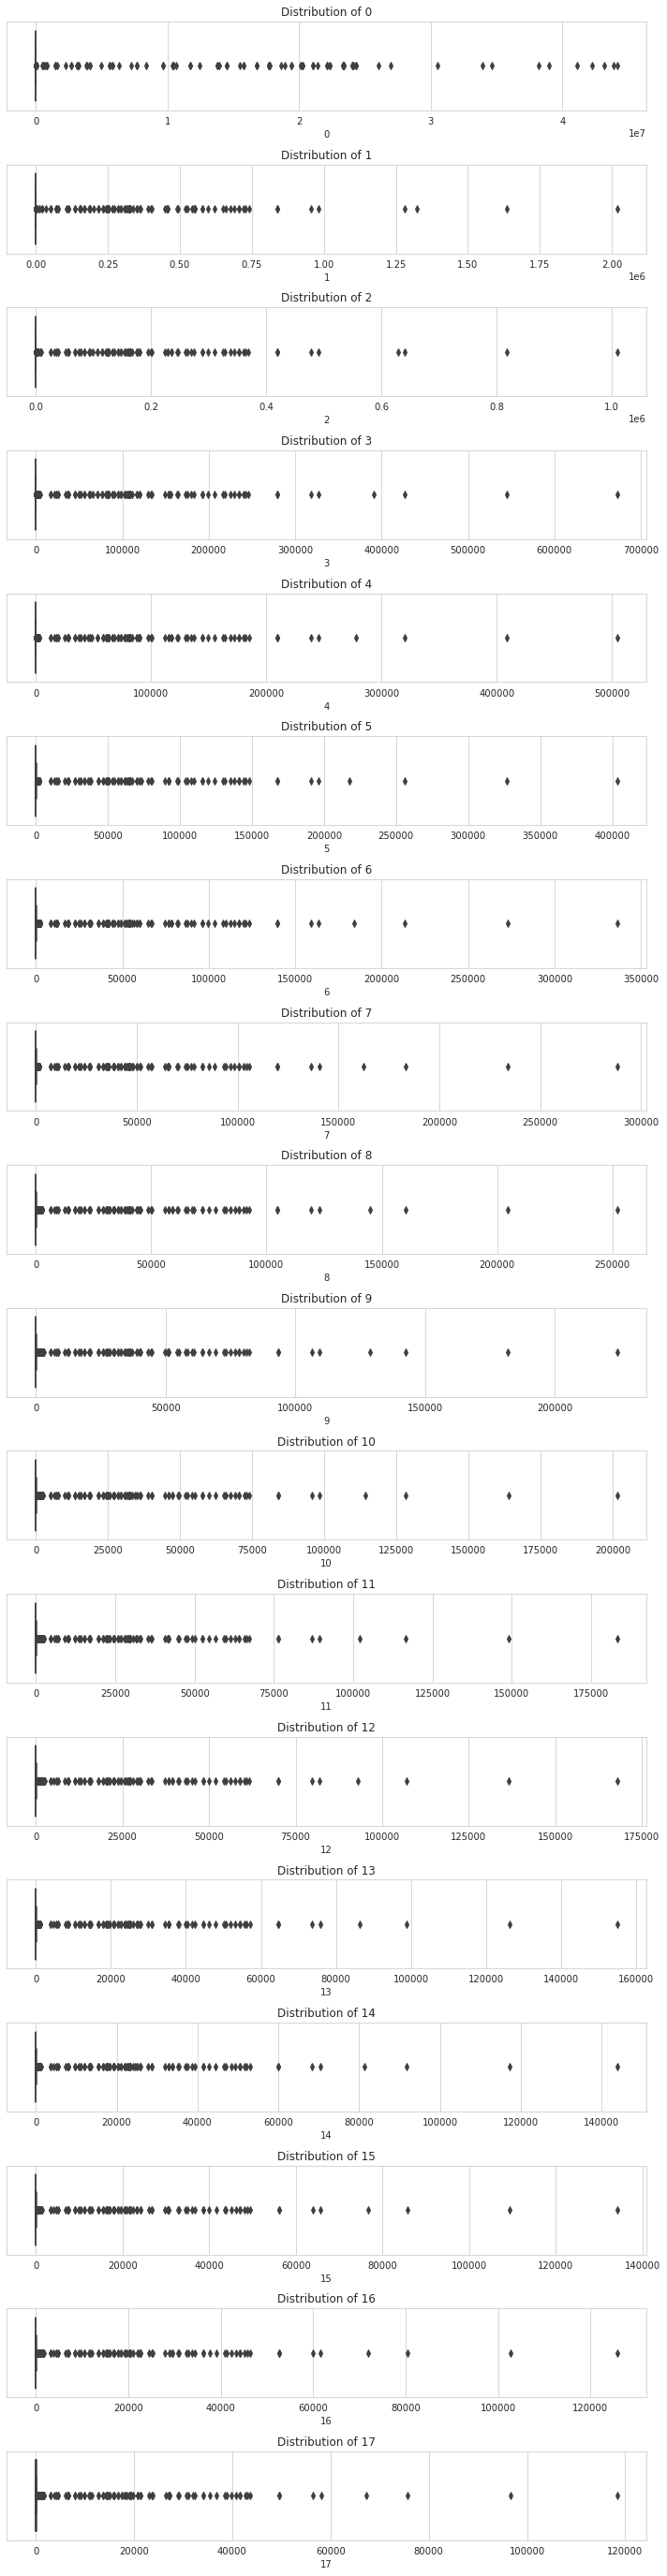

In [25]:


plt.figure(figsize=(10,40))
for x in (range(1,19)):
    plt.subplot(19,1,x)
    sns.boxplot(x =  pd_fft.columns[x-1], data=pd_fft)
    x_name = pd_fft.columns[x-1]
    plt.title(f'Distribution of {x_name}')         
plt.tight_layout()

In [26]:
body_acc_x_train_reduce = pca.fit_transform(body_acc_x_train)


body_acc_y_train_reduce = pca.fit_transform(body_acc_y_train)


body_acc_z_train_reduce = pca.fit_transform(body_acc_z_train)


body_gyro_x_train_reduce = pca.fit_transform(body_gyro_x_train)


body_gyro_y_train_reduce = pca.fit_transform(body_gyro_y_train)


body_gyro_z_train_reduce = pca.fit_transform(body_gyro_z_train)

In [27]:
body_acc_x_train_fft_reduce = pca.fit_transform(body_acc_x_train_fft)


body_acc_y_train_fft_reduce = pca.fit_transform(body_acc_y_train_fft)


body_acc_z_train_fft_reduce = pca.fit_transform(body_acc_z_train_fft)


body_gyro_x_train_fft_reduce = pca.fit_transform(body_gyro_x_train_fft)


body_gyro_y_train_fft_reduce = pca.fit_transform(body_gyro_y_train_fft)


body_gyro_z_train_fft_reduce = pca.fit_transform(body_gyro_z_train_fft)

In [28]:
from scipy import stats

pca_new = pd.DataFrame(body_acc_x_train.mean(axis=1))
pca_new.columns = ['tBodyAcc-mean()-x']
pca_new['tBodyAcc-mean()-y'] = body_acc_y_train.mean(axis=1)
pca_new['tBodyAcc-mean()-z'] = body_acc_z_train.mean(axis=1)
pca_new['tBodyGyro-mean()-x'] = body_gyro_x_train.mean(axis=1)
pca_new['tBodyGyro-mean()-y'] = body_gyro_y_train.mean(axis=1)
pca_new['tBodyGyro-mean()-z'] = body_gyro_z_train.mean(axis=1)


pca_new['tBodyAcc-std()-x'] =body_acc_x_train.std(axis=1)
pca_new['tBodyAcc-std()-y'] = body_acc_y_train.std(axis=1)
pca_new['tBodyAcc-std()-z'] = body_acc_z_train.std(axis=1)
pca_new['tBodyGyro-std()-x'] = body_gyro_x_train.std(axis=1)
pca_new['tBodyGyro-std()-y'] = body_gyro_y_train.std(axis=1)
pca_new['tBodyGyro-std()-z'] = body_gyro_z_train.std(axis=1)


pca_new['tBodyAcc-mad()-x'] = pd.DataFrame(body_acc_x_train).mad(axis=1)
pca_new['tBodyAcc-mad()-y'] = pd.DataFrame(body_acc_y_train).mad(axis=1)
pca_new['tBodyAcc-mad()-z'] = pd.DataFrame(body_acc_z_train).mad(axis=1)
pca_new['tBodyGyro-mad()-x'] = pd.DataFrame(body_gyro_x_train).mad(axis=1)
pca_new['tBodyGyro-mad()-y'] = pd.DataFrame(body_gyro_y_train).mad(axis=1)
pca_new['tBodyGyro-mad()-z'] = pd.DataFrame(body_gyro_z_train).mad(axis=1)


pca_new['tBodyAcc-max()-x'] = body_acc_x_train.max(axis=1)
pca_new['tBodyAcc-max()-y'] = body_acc_y_train.max(axis=1)
pca_new['tBodyAcc-max()-z'] = body_acc_z_train.max(axis=1)
pca_new['tBodyGyro-max()-x'] = body_gyro_x_train.max(axis=1)
pca_new['tBodyGyro-max()-y'] = body_gyro_y_train.max(axis=1)
pca_new['tBodyGyro-max()-z'] = body_gyro_z_train.max(axis=1)


pca_new['tBodyAcc-min()-x'] = body_acc_x_train.min(axis=1)
pca_new['tBodyAcc-min()-y'] = body_acc_y_train.min(axis=1)
pca_new['tBodyAcc-min()-z'] = body_acc_z_train.min(axis=1)
pca_new['tBodyGyro-min()-x'] = body_gyro_x_train.min(axis=1)
pca_new['tBodyGyro-min()-y'] = body_gyro_y_train.min(axis=1)
pca_new['tBodyGyro-min()-z'] = body_gyro_z_train.min(axis=1)


pca_new['tBodyAcc-median()-x'] = pd.DataFrame(body_acc_x_train).median(axis=1)
pca_new['tBodyAcc-median()-y'] = pd.DataFrame(body_acc_y_train).median(axis=1)
pca_new['tBodyAcc-median()-z'] = pd.DataFrame(body_acc_z_train).median(axis=1)
pca_new['tBodyGyro-median()-x'] = pd.DataFrame(body_gyro_x_train).median(axis=1)
pca_new['tBodyGyro-median()-y'] = pd.DataFrame(body_gyro_y_train).median(axis=1)
pca_new['tBodyGyro-median()-z'] =pd.DataFrame( body_gyro_z_train).median(axis=1)


# number of peaks
pca_new['x_acc_peak_count'] = len(find_peaks(body_acc_x_train_reduce.flatten())[0])
pca_new['y_acc_peak_count'] =  len(find_peaks(body_acc_y_train_reduce.flatten())[0])
pca_new['z_acc_peak_count'] = len(find_peaks(body_acc_z_train_reduce.flatten())[0])

# skewness
pca_new['x_acc_skewness'] = stats.skew(body_acc_x_train_reduce.flatten())
pca_new['y_acc_skewness'] = stats.skew(body_acc_y_train_reduce.flatten())
pca_new['z_acc_skewness'] = stats.skew(body_acc_z_train_reduce.flatten())

# kurtosis
pca_new['x_acc_kurtosis'] =stats.kurtosis(body_acc_x_train_reduce.flatten())
pca_new['y_acc_kurtosis'] = stats.kurtosis(body_acc_y_train_reduce.flatten())
pca_new['z_acc_kurtosis'] = stats.kurtosis(body_acc_y_train_reduce.flatten())


# number of peaks
pca_new['x_gyro_peak_count'] = len(find_peaks(body_gyro_x_train_reduce.flatten())[0])
pca_new['y_gyro_peak_count'] =  len(find_peaks(body_gyro_y_train_reduce.flatten())[0])
pca_new['z_gyro_peak_count'] = len(find_peaks(body_gyro_z_train_reduce.flatten())[0])

# skewness
pca_new['x_gyro_skewness'] = stats.skew(body_gyro_x_train_reduce.flatten())
pca_new['y_gyro_skewness'] = stats.skew(body_gyro_y_train_reduce.flatten())
pca_new['z_gyro_skewness'] = stats.skew(body_gyro_z_train_reduce.flatten())

# kurtosis
pca_new['x_gyro_kurtosis'] =stats.kurtosis(body_gyro_x_train_reduce.flatten())
pca_new['y_gyro_kurtosis'] = stats.kurtosis(body_gyro_y_train_reduce.flatten())
pca_new['z_gyro_kurtosis'] = stats.kurtosis(body_gyro_y_train_reduce.flatten())


In [29]:
pca_new['tBodyAcc-mean()-x-fft'] = body_acc_x_train_fft.mean(axis=1)
pca_new['tBodyAcc-mean()-y-fft'] = body_acc_y_train_fft.mean(axis=1)
pca_new['tBodyAcc-mean()-z-fft'] = body_acc_z_train_fft.mean(axis=1)
pca_new['tBodyGyro-mean()-x-fft'] = body_gyro_x_train_fft.mean(axis=1)
pca_new['tBodyGyro-mean()-y-fft'] = body_gyro_y_train_fft.mean(axis=1)
pca_new['tBodyGyro-mean()-z-fft'] = body_gyro_z_train_fft.mean(axis=1)


pca_new['tBodyAcc-std()-x-fft'] =body_acc_x_train_fft.std(axis=1)
pca_new['tBodyAcc-std()-y-fft'] = body_acc_y_train_fft.std(axis=1)
pca_new['tBodyAcc-std()-z-fft'] = body_acc_z_train_fft.std(axis=1)
pca_new['tBodyGyro-std()-x-fft'] = body_gyro_x_train_fft.std(axis=1)
pca_new['tBodyGyro-std()-y-fft'] = body_gyro_y_train_fft.std(axis=1)
pca_new['tBodyGyro-std()-z-fft'] = body_gyro_z_train_fft.std(axis=1)


pca_new['tBodyAcc-mad()-x-fft'] = pd.DataFrame(body_acc_x_train_fft).mad(axis=1)
pca_new['tBodyAcc-mad()-y-fft'] = pd.DataFrame(body_acc_y_train_fft).mad(axis=1)
pca_new['tBodyAcc-mad()-z-fft'] = pd.DataFrame(body_acc_z_train_fft).mad(axis=1)
pca_new['tBodyGyro-mad()-x-fft'] = pd.DataFrame(body_gyro_x_train_fft).mad(axis=1)
pca_new['tBodyGyro-mad()-y-fft'] = pd.DataFrame(body_gyro_y_train_fft).mad(axis=1)
pca_new['tBodyGyro-mad()-z-fft'] = pd.DataFrame(body_gyro_z_train_fft).mad(axis=1)


pca_new['tBodyAcc-max()-x-fft'] = body_acc_x_train_fft.max(axis=1)
pca_new['tBodyAcc-max()-y-fft'] = body_acc_y_train_fft.max(axis=1)
pca_new['tBodyAcc-max()-z-fft'] = body_acc_z_train_fft.max(axis=1)
pca_new['tBodyGyro-max()-x-fft'] = body_gyro_x_train_fft.max(axis=1)
pca_new['tBodyGyro-max()-y-fft'] = body_gyro_y_train_fft.max(axis=1)
pca_new['tBodyGyro-max()-z-fft'] = body_gyro_z_train_fft.max(axis=1)


pca_new['tBodyAcc-min()-x'] = body_acc_x_train_fft.min(axis=1)
pca_new['tBodyAcc-min()-y'] = body_acc_y_train_fft.min(axis=1)
pca_new['tBodyAcc-min()-z'] = body_acc_z_train_fft.min(axis=1)
pca_new['tBodyGyro-min()-x'] = body_gyro_x_train_fft.min(axis=1)
pca_new['tBodyGyro-min()-y'] = body_gyro_y_train_fft.min(axis=1)
pca_new['tBodyGyro-min()-z'] = body_gyro_z_train_fft.min(axis=1)


pca_new['tBodyAcc-median()-x'] = pd.DataFrame(body_acc_x_train_fft).median(axis=1)
pca_new['tBodyAcc-median()-y'] = pd.DataFrame(body_acc_y_train_fft).median(axis=1)
pca_new['tBodyAcc-median()-z'] = pd.DataFrame(body_acc_z_train_fft).median(axis=1)
pca_new['tBodyGyro-median()-x'] = pd.DataFrame(body_gyro_x_train_fft).median(axis=1)
pca_new['tBodyGyro-median()-y'] = pd.DataFrame(body_gyro_y_train_fft).median(axis=1)
pca_new['tBodyGyro-median()-z'] =pd.DataFrame( body_gyro_z_train_fft).median(axis=1)


# number of peaks
pca_new['x_acc_peak_count'] = len(find_peaks(body_acc_x_train_fft_reduce.flatten())[0])
pca_new['y_acc_peak_count'] =  len(find_peaks(body_acc_y_train_fft_reduce.flatten())[0])
pca_new['z_acc_peak_count'] = len(find_peaks(body_acc_z_train_fft_reduce.flatten())[0])

# skewness
pca_new['x_acc_skewness'] = stats.skew(body_acc_x_train_fft_reduce.flatten())
pca_new['y_acc_skewness'] = stats.skew(body_acc_y_train_fft_reduce.flatten())
pca_new['z_acc_skewness'] = stats.skew(body_acc_z_train_fft_reduce.flatten())

# kurtosis
pca_new['x_acc_kurtosis'] =stats.kurtosis(body_acc_x_train_fft_reduce.flatten())
pca_new['y_acc_kurtosis'] = stats.kurtosis(body_acc_y_train_fft_reduce.flatten())
pca_new['z_acc_kurtosis'] = stats.kurtosis(body_acc_y_train_fft_reduce.flatten())


# number of peaks
pca_new['x_gyro_peak_count'] = len(find_peaks(body_gyro_x_train_fft_reduce.flatten())[0])
pca_new['y_gyro_peak_count'] =  len(find_peaks(body_gyro_y_train_fft_reduce.flatten())[0])
pca_new['z_gyro_peak_count'] = len(find_peaks(body_gyro_z_train_fft_reduce.flatten())[0])

# skewness
pca_new['x_gyro_skewness'] = stats.skew(body_gyro_x_train_fft_reduce.flatten())
pca_new['y_gyro_skewness'] = stats.skew(body_gyro_y_train_fft_reduce.flatten())
pca_new['z_gyro_skewness'] = stats.skew(body_gyro_z_train_fft_reduce.flatten())

# kurtosis
pca_new['x_gyro_kurtosis'] =stats.kurtosis(body_gyro_x_train_fft_reduce.flatten())
pca_new['y_gyro_kurtosis'] = stats.kurtosis(body_gyro_y_train_fft_reduce.flatten())
pca_new['z_gyro_kurtosis'] = stats.kurtosis(body_gyro_y_train_fft_reduce.flatten())


In [30]:
pca_new.shape
pca_new.columns

Index(['tBodyAcc-mean()-x', 'tBodyAcc-mean()-y', 'tBodyAcc-mean()-z',
       'tBodyGyro-mean()-x', 'tBodyGyro-mean()-y', 'tBodyGyro-mean()-z',
       'tBodyAcc-std()-x', 'tBodyAcc-std()-y', 'tBodyAcc-std()-z',
       'tBodyGyro-std()-x', 'tBodyGyro-std()-y', 'tBodyGyro-std()-z',
       'tBodyAcc-mad()-x', 'tBodyAcc-mad()-y', 'tBodyAcc-mad()-z',
       'tBodyGyro-mad()-x', 'tBodyGyro-mad()-y', 'tBodyGyro-mad()-z',
       'tBodyAcc-max()-x', 'tBodyAcc-max()-y', 'tBodyAcc-max()-z',
       'tBodyGyro-max()-x', 'tBodyGyro-max()-y', 'tBodyGyro-max()-z',
       'tBodyAcc-min()-x', 'tBodyAcc-min()-y', 'tBodyAcc-min()-z',
       'tBodyGyro-min()-x', 'tBodyGyro-min()-y', 'tBodyGyro-min()-z',
       'tBodyAcc-median()-x', 'tBodyAcc-median()-y', 'tBodyAcc-median()-z',
       'tBodyGyro-median()-x', 'tBodyGyro-median()-y', 'tBodyGyro-median()-z',
       'x_acc_peak_count', 'y_acc_peak_count', 'z_acc_peak_count',
       'x_acc_skewness', 'y_acc_skewness', 'z_acc_skewness', 'x_acc_kurtosis',
       '

In [31]:
pd.isna(pca_new).sum()

tBodyAcc-mean()-x        0
tBodyAcc-mean()-y        0
tBodyAcc-mean()-z        0
tBodyGyro-mean()-x       0
tBodyGyro-mean()-y       0
                        ..
tBodyAcc-max()-y-fft     0
tBodyAcc-max()-z-fft     0
tBodyGyro-max()-x-fft    0
tBodyGyro-max()-y-fft    0
tBodyGyro-max()-z-fft    0
Length: 78, dtype: int64

Text(0.5, 1.0, 'Correlation between different fearures')

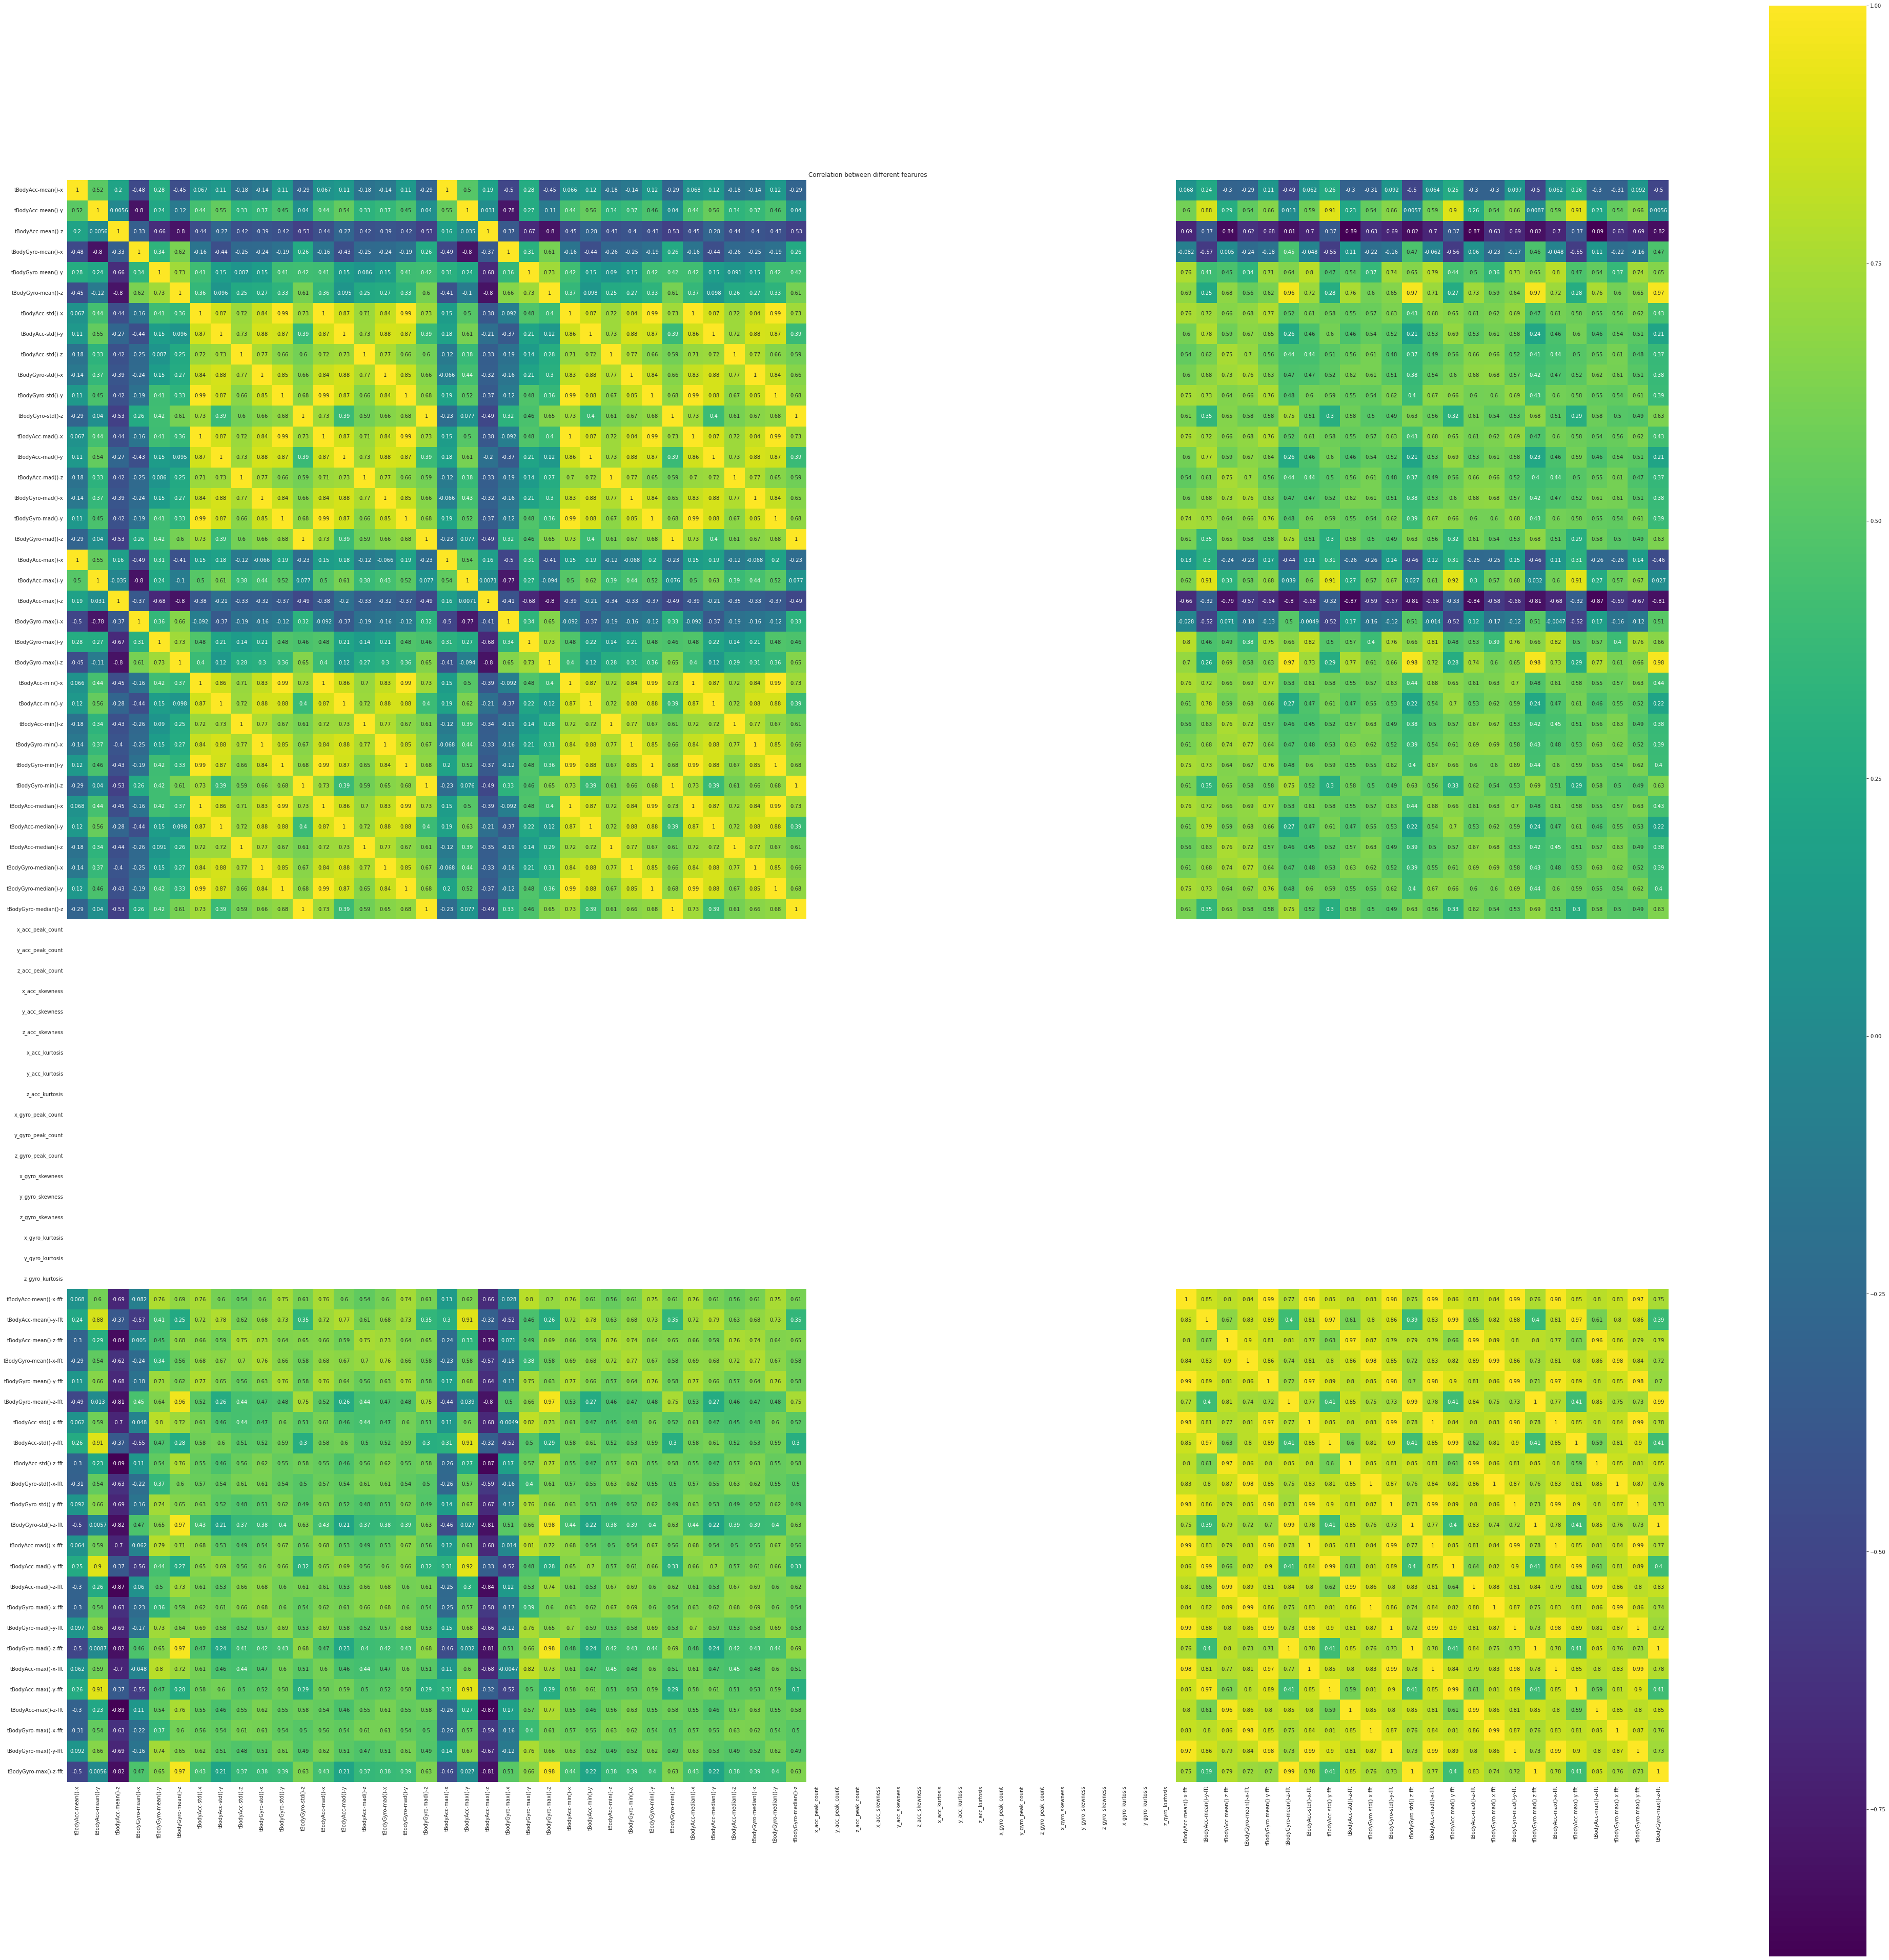

In [32]:

correlation = pca_new.corr()

plt.figure(figsize=(70,70))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between different fearures')


In [33]:
correlation_plot = correlation.corr()
plt.figure(figsize=(70,70))
correlation_plot.style.background_gradient(cmap = 'RdYlGn')

/Users/DELL/opt/anaconda3/lib/python3.9/site-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/Users/DELL/opt/anaconda3/lib/python3.9/site-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


<Figure size 5040x5040 with 0 Axes>

In [34]:
#pip install TSNE


In [35]:
from sklearn.manifold import TSNE

tsne_data = pca_new.copy()


# Scale data
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
tsne_data = scl.fit_transform(tsne_data)

# Reduce dimensions (speed up)
pca = PCA(n_components=0.9, random_state=3)
tsne_data_pca = pca.fit_transform(tsne_data)

# Transform data
tsne = TSNE(random_state=3)
tsne_transformed = tsne.fit_transform(tsne_data)
tsne_transformed_pca = tsne.fit_transform(tsne_data_pca)

/Users/DELL/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/DELL/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/DELL/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/DELL/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


No handles with labels found to put in legend.


18


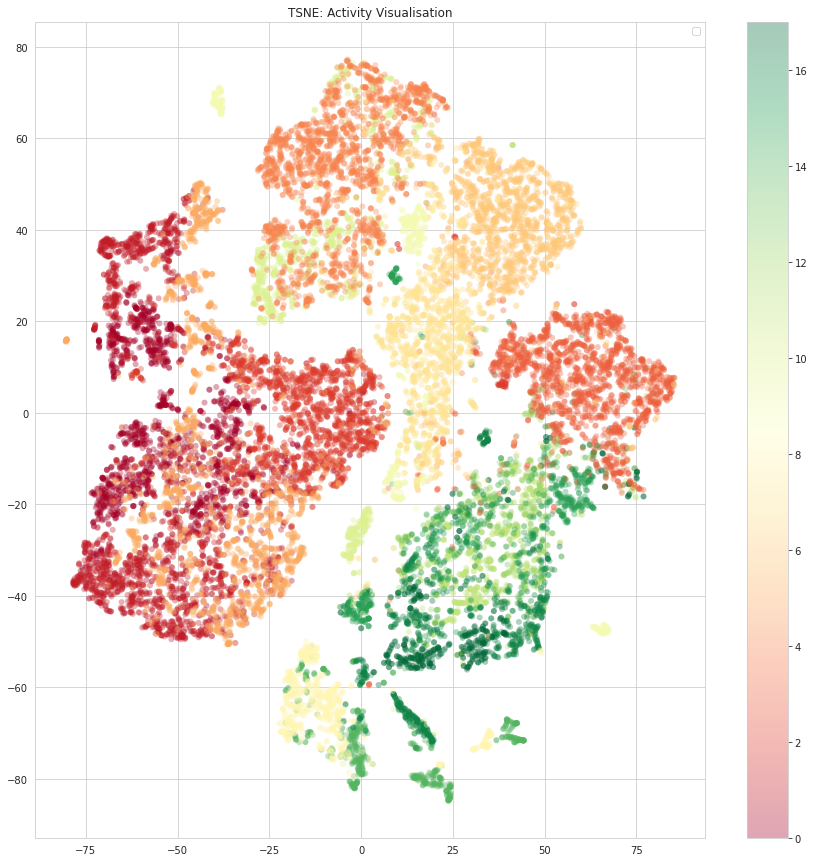

In [36]:
# To create plots
from matplotlib.colors import rgb2hex
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
# To create nicer plots
import seaborn as sns

# Create subplots
plt.figure(figsize=(15,15))

### Plot Activities
# Get colors
label_counts = pd_labels.value_counts()

n = label_counts.shape[0]

print(n)
colormap = get_cmap('viridis')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]
plt.scatter(tsne_transformed[:,0],tsne_transformed[:,1], c =pd_labels.values , cmap = "RdYlGn", edgecolor = "None", alpha=0.35)
  

plt.colorbar()
plt.title('TSNE: Activity Visualisation')
plt.legend()
plt.show()

No handles with labels found to put in legend.


18


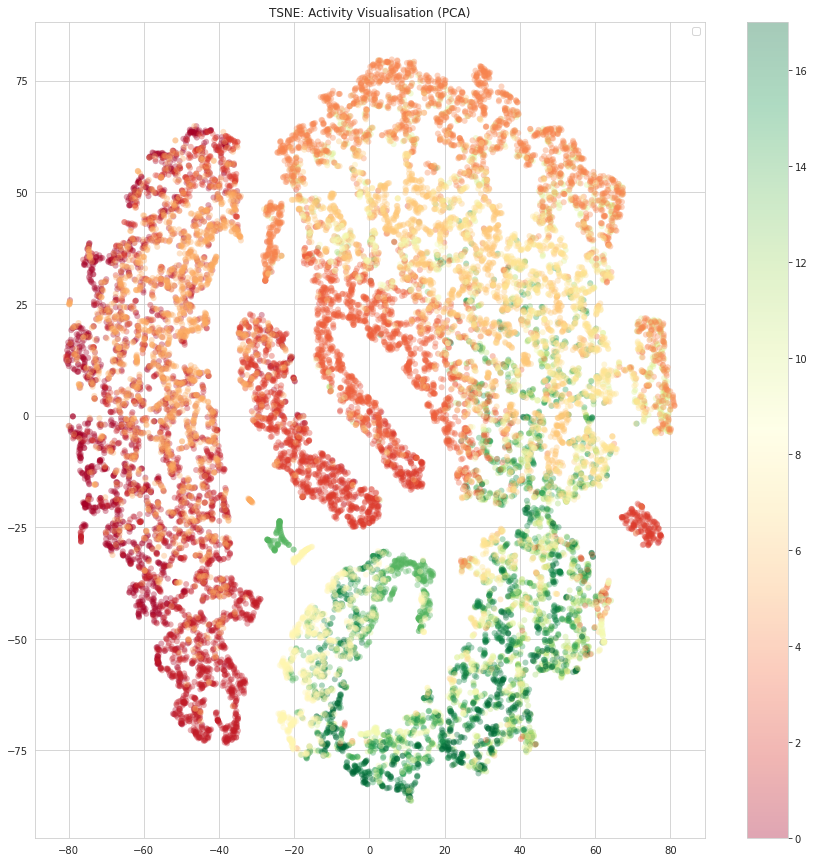

In [37]:
# Create subplots
plt.figure(figsize=(15,15))

### Plot Activities
# Get colors
label_counts = pd_labels.value_counts()

n = label_counts.shape[0]

print(n)
colormap = get_cmap('viridis')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]
plt.scatter(tsne_transformed_pca[:,0],tsne_transformed_pca[:,1], c =pd_labels.values , cmap = "RdYlGn", edgecolor = "None", alpha=0.35)
  

plt.colorbar()
plt.title('TSNE: Activity Visualisation (PCA)')
plt.legend()
plt.show()

In [42]:
X_train, X_test, y_train, y_test=train_test_split(pca_new,labels, test_size=0.2, random_state=9, stratify=labels)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

pd.DataFrame( y_train).value_counts()

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) 

print(X_val.shape)

(16600, 78)
(4150, 78)
(16600,)
(4150,)
(4150, 78)


In [43]:
# data standardization 
st_x= StandardScaler() ;

X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)  
X_val= st_x.transform(X_val)


Class=4, n=1317 (10.578%)
Class=3, n=1097 (8.811%)
Class=8, n=391 (3.141%)
Class=0, n=1132 (9.092%)
Class=14, n=355 (2.851%)
Class=15, n=469 (3.767%)
Class=2, n=1111 (8.924%)
Class=10, n=611 (4.908%)
Class=7, n=807 (6.482%)
Class=1, n=1108 (8.900%)
Class=17, n=256 (2.056%)
Class=5, n=1087 (8.731%)
Class=6, n=1064 (8.546%)
Class=11, n=545 (4.378%)
Class=13, n=154 (1.237%)
Class=16, n=466 (3.743%)
Class=9, n=291 (2.337%)
Class=12, n=189 (1.518%)


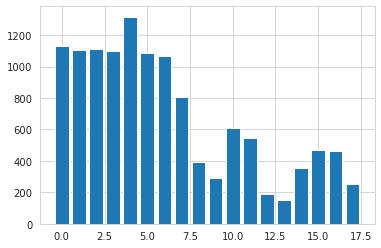

In [44]:
from collections import Counter
from matplotlib import pyplot
counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y_train) * 100

	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Counter({4.0: 1317, 0.0: 1132, 2.0: 1111, 1.0: 1108, 3.0: 1097, 5.0: 1087, 6.0: 1064, 7.0: 807, 10.0: 611, 11.0: 545, 15.0: 469, 16.0: 466, 8.0: 391, 14.0: 355, 9.0: 291, 17.0: 256, 12.0: 189, 13.0: 154})
Class=4, n=1290 (10.726%)
Class=3, n=1072 (8.913%)
Class=8, n=388 (3.226%)
Class=0, n=1066 (8.863%)
Class=14, n=352 (2.927%)
Class=15, n=447 (3.717%)
Class=2, n=1075 (8.938%)
Class=10, n=589 (4.897%)
Class=7, n=786 (6.535%)
Class=1, n=1060 (8.814%)
Class=17, n=248 (2.062%)
Class=5, n=1034 (8.597%)
Class=6, n=1047 (8.705%)
Class=13, n=154 (1.280%)
Class=11, n=510 (4.240%)
Class=16, n=448 (3.725%)
Class=9, n=289 (2.403%)
Class=12, n=172 (1.430%)


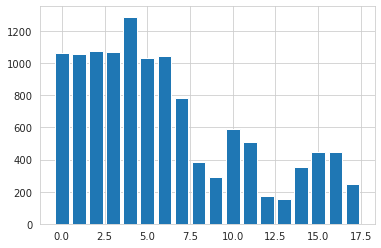

In [45]:
# Undersample and plot imbalanced dataset with Tomek Links
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import TomekLinks
from matplotlib import pyplot
from numpy import where

# summarize class distribution
counter = Counter(y_train)
print(counter)
# define the undersampling method
undersample = TomekLinks()
# transform the dataset
X, y = undersample.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [46]:
#Classifying HAR samples:
from sklearn.ensemble import RandomForestClassifier
lr_r = RandomForestClassifier(n_estimators=300, max_features='sqrt')
lr_r.fit(X,  y)
accuracy_r = lr_r.score(X_test, y_test)


In [47]:
# Showing results:
from sklearn.metrics import classification_report, confusion_matrix,recall_score, precision_score
print('Classification Accuracy: ',accuracy_r)
y_pred=lr_r.predict(X_test)
print('\nConfusion Report: ') 
print(classification_report(y_test, y_pred))

Classification Accuracy:  0.9313253012048193

Confusion Report: 
              precision    recall  f1-score   support

         0.0       0.88      0.89      0.89       377
         1.0       0.92      0.90      0.91       375
         2.0       0.90      0.96      0.93       359
         3.0       0.94      0.98      0.96       373
         4.0       0.96      0.97      0.97       436
         5.0       0.93      0.90      0.91       363
         6.0       0.95      0.97      0.96       352
         7.0       0.95      0.93      0.94       267
         8.0       1.00      0.97      0.98       133
         9.0       1.00      0.97      0.98        96
        10.0       0.96      0.91      0.94       201
        11.0       0.88      0.90      0.89       176
        12.0       0.84      0.57      0.68        63
        13.0       0.86      0.81      0.83        52
        14.0       0.97      0.99      0.98       119
        15.0       0.90      0.95      0.93       160
        16.0    

In [48]:
#importing the required libraries 
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
sns.set()


In [49]:
#Fitting the df into LR model 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

print(f'Model score - train - {reg_model.score(X_train, y_train)}')
print(f'Model score - test  - {reg_model.score(X_test, y_test)}')

lr_pred = reg_model.predict(X_test)
mse = mean_squared_error(y_test, lr_pred)

print(f'Score RMSE: {math.sqrt(mse)}')

Model score - train - 0.597261981857448
Model score - test  - -23.97756412074262
Score RMSE: 23.979512484253355


In [ ]:
#model_parameters = [
#    ('scalar', StandardScaler()),
#   ('poly', PolynomialFeatures(degree=3)),
#   ('model', LinearRegression())
#]

#pipeline = Pipeline(model_parameters)
#pipeline.fit(X_train, y_train)

#print(f'Model score - train - {pipeline.score(X_train, y_train)}')
#print(f'Model score - test - {pipeline.score(X_test, y_test)}')

In [50]:
#using the regularization methods 
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=10, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)

print(f'Model score - train - {ridge_pipe.score(X_train, y_train)}')
print(f'Model score - test - {ridge_pipe.score(X_test, y_test)}')

Model score - train - 0.25121300413038083
Model score - test - -631.5591361123966


In [51]:
#using the regularization methods 
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.3, fit_intercept=True))
]

lasso_pipe = Pipeline(steps)

lasso_pipe.fit(X_train, y_train)

print(f'Model score - train - {lasso_pipe.score(X_train, y_train)}')
print(f'Model score - test - {lasso_pipe.score(X_test, y_test)}')

Model score - train - 0.008643178896487469
Model score - test - 0.011708981224682447
